In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

## Model and Helper Functions

In [2]:
def min_max_normalize(lst):
    """
        Helper function for movielens dataset, not useful for discrete multi class clasification.

        Return:
        Normalized list x, in range [0, 1]
    """
    maximum = max(lst)
    minimum = min(lst)
    toreturn = []
    for i in range(len(lst)):
        toreturn.append((lst[i]- minimum)/ (maximum - minimum))
    return toreturn

In [3]:
def z_standardize(X_inp):
    """
        Z-score Standardization.
        Standardize the feature matrix, and store the standarize rule.

        Parameter:
        X_inp: Input feature matrix.

        Return:
        Standardized feature matrix.
    """
    
    toreturn = X_inp.copy()
    for i in range(X_inp.shape[1]):
        std = np.std(X_inp[:, i])               # ------ Find the standard deviation of the feature
        mean = np.mean(X_inp[:, i])             # ------ Find the mean value of the feature
        toreturn[:, i] = (X_inp[:, i] - mean)/std
    return toreturn

In [4]:
def sigmoid(x):
    """ 
        Sigmoid Function

        Return:
        transformed x.
    """
    """    
        #TODO: 2. implement the sigmoid function
    """
    return 1 / (1 + np.exp(-x))

def cross_entropy(y, pred):
    return (-y * np.log(pred) - (1 - y) * np.log(1 - pred)).mean()

In [5]:
class Logistic_Regression():
    
    def __init__(self):
        """
            Some initializations, if neccesary
        """
        
        self.model_name = 'Logistic Regression'
    
    def fit(self, X_train, y_train, standardized = True):
        """
            Save the datasets in our model, and do normalization to y_train
        """
        
        self.X = X_train
        self.y = y_train
        
        count = 0
        uni = np.unique(y_train)
        for i,y in enumerate(y_train):
            if y == min(uni):
                self.y[i] = 0
            else:
                self.y[i] = 1 
        self.standardized = standardized
        if self.standardized:
            self.X = z_standardize(self.X)
        self.W = np.zeros(X_train.shape[1])
        self.b = 0
    
    def gradient(self, X, y):
        """
            Calculate the grandient of Weight and Bias
        """
        Z = X @ self.W + self.b
        
        y_hat = sigmoid(Z)
        dy = (y_hat - y) / (self.X.shape[0])
        dZ = dy * sigmoid(y_hat) * (1-sigmoid(y_hat))
        dW = X.T @ dZ
        db = np.ones((1, X.shape[0])) @ dZ 
        return dW, db

    def gradient_descent_logistic(self, alpha, num_pass, early_stop=0):
        """
            Logistic Regression with gradient descent method

            Parameter:
                alpha: (Hyper Parameter) Learning rate.
                num_pass: Number of iteration
                early_stop: (Hyper Parameter) Least improvement error allowed before stop. 
                            If improvement is less than the given value, then terminate the function and store the coefficents.
                            default = 0.
                standardized: bool, determine if we standardize the feature matrix.
                
            Return:
                self.theta: theta after training
                self.b: b after training
        """
        
        self.loss = []
        self.acc = []
        for i in range(num_pass):    
            dW, db = self.gradient(self.X, self.y)
            self.W = self.W - alpha * dW
            self.b = self.b - alpha * db
            
            y_hat = sigmoid(self.X @ self.W + self.b)
            loss = cross_entropy(self.y, y_hat)

            if (len(self.loss) > 0 ) and ((abs(self.loss[-1] - loss) < early_stop) |
                                            (abs(abs(self.loss[-1] - loss) / self.loss[-1]) < early_stop)):
                return self.W, self.b

            self.loss += [loss]
            self.acc += [((self.y == (y_hat >= 0.5)).mean())]
            
            if i % 1000 == 0:
                print('Iteration: ' +  str(i))
                print('Coef: '+ str(self.W) + ", " + str(self.b))
                print('Loss: ' + str(loss))   
        return self.W, self.b
    
    def predict(self, X):
        """
            X is a matrix or 2-D numpy array, represnting testing instances. 
            Each testing instance is a feature vector. 
        """
        if self.standardized:
            self.X = z_standardize(self.X)
        return np.where(sigmoid(X @ self.W + self.b) >= 0.5, 1, 0)
    
    

## Test

In [6]:
url_Wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
#names = ['f_acid', 'v_acid', 'c_acid', 'sugar', 'chlorides', 'f_SO2', 't_SO2', 'density', 'ph', 'sulphates', 'alcohol', 'quality']
wine = pd.read_csv(url_Wine, delimiter=';')

In [7]:
wine5 = wine.loc[wine.quality == 5]
wine6 = wine.loc[wine.quality == 6]
wineall = pd.concat([wine5,wine6])
wineall

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [8]:
X = np.array(wineall.iloc[:,:10])
Y = np.array(wineall.quality)

In [9]:
count = 0
for y in Y:
    if y == 5:
        Y[count] = 0
    else:
        Y[count] = 1
    count += 1

In [10]:
logit = Logistic_Regression()
logit.fit(X, Y)

In [11]:
logit.gradient_descent_logistic(0.01, 50000,0)

Iteration: 0
Coef: [ 6.27683713e-05 -2.78558358e-04  9.41231922e-05 -2.16700614e-05
 -9.60805618e-05 -7.11897427e-05 -2.80758301e-04 -1.58025055e-04
  5.05755007e-05  1.90727427e-04], [-3.83061396e-05]
Loss: 0.6930411107082884
Iteration: 1000
Coef: [ 0.04594997 -0.19108238  0.05105867  0.00900075 -0.0781566  -0.021157
 -0.2033459  -0.12871574  0.05089631  0.14822019], [-0.0324577]
Loss: 0.6350972084140096
Iteration: 2000
Coef: [ 0.0834463  -0.28122899  0.06165878  0.04354911 -0.12845384  0.00117229
 -0.31910125 -0.21472579  0.08987958  0.24298043], [-0.05313458]
Loss: 0.6153240026009489
Iteration: 3000
Coef: [ 0.12152665 -0.32677755  0.05917715  0.08014262 -0.16159769  0.03192071
 -0.39652544 -0.2774166   0.11723673  0.30898524], [-0.06592489]
Loss: 0.6057961783675673
Iteration: 4000
Coef: [ 0.15983953 -0.35018831  0.05186447  0.11254042 -0.18401809  0.06193623
 -0.45332685 -0.32684761  0.13708584  0.35712621], [-0.07390404]
Loss: 0.6002174361400108
Iteration: 5000
Coef: [ 0.19738479 -

Iteration: 44000
Coef: [ 0.78271604 -0.37824621 -0.11671846  0.32052017 -0.18323534  0.22896855
 -0.644889   -0.80009596  0.3790699   0.5441469 ], [-0.08204903]
Loss: 0.5828646447463524
Iteration: 45000
Coef: [ 0.78746868 -0.37889502 -0.11846097  0.32144329 -0.1823579   0.22827945
 -0.64369905 -0.8029704   0.38131306  0.54431379], [-0.08189046]
Loss: 0.5828470369816737
Iteration: 46000
Coef: [ 0.7920167  -0.37952536 -0.12013819  0.32232604 -0.18151592  0.22760435
 -0.64254353 -0.805717    0.38346042  0.54447125], [-0.08173755]
Loss: 0.5828309320166036
Iteration: 47000
Coef: [ 0.79636955 -0.38013712 -0.12175216  0.3231704  -0.18070806  0.22694442
 -0.64142283 -0.80834214  0.38551626  0.54462005], [-0.08159016]
Loss: 0.5828162009896128
Iteration: 48000
Coef: [ 0.80053619 -0.38073027 -0.12330486  0.32397822 -0.17993302  0.22630056
 -0.64033714 -0.8108518   0.38748468  0.54476087], [-0.08144815]
Loss: 0.5828027264359437
Iteration: 49000
Coef: [ 0.80452511 -0.38130487 -0.12479827  0.3247512

(array([ 0.80834062, -0.38186051, -0.12623295,  0.32549035, -0.17847705,
         0.22506424, -0.63827142, -0.81554462,  0.39117285,  0.54502082]),
 array([-0.08117981]))

In [12]:
Y_hat = logit.predict(z_standardize(X))
(Y_hat == Y).mean()

0.7081122062168309

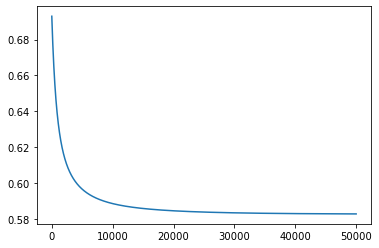

In [13]:
plt.plot(logit.loss)